Environment Problem
1. Familiarize yourself with the dataset, then write some python code which returns a line graph of the record high and record low temperatures by day of the year over the period 2005-2014. The area between the record high and record low temperatures for each day should be shaded.
2. Overlay a scatter of the 2015 data for any points (highs and lows) for which the ten year record (2005-2014) record high or record low was broken in 2015.
3. Watch out for leap days (i.e. February 29th), it is reasonable to remove these points from the dataset for the purpose of this visualization.
4. Consider issues such as legends, labels, and chart junk.
5. The data you have been given is near **Ann Arbor, Michigan, United States**, and visualize on map the stations the data.
6. Plot Temperature Summary near Ann Arbor, Michigan, United States (Year 2015).  

In [ ]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
df=pd.read_csv('/content/drive/MyDrive/python/tranzmeo/machine_test/temperature.csv')
df.head()

,ID,Date,Element,Data_Value
0,USW00094889,2014-11-12,TMAX,22
1,USC00208972,2009-04-29,TMIN,56
2,USC00200032,2008-05-26,TMAX,278
3,USC00205563,2005-11-11,TMAX,139
4,USC00200230,2014-02-27,TMAX,-106


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165085 entries, 0 to 165084
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   ID          165085 non-null  object
 1   Date        165085 non-null  object
 2   Element     165085 non-null  object
 3   Data_Value  165085 non-null  int64 
dtypes: int64(1), object(3)
memory usage: 5.0+ MB


In [ ]:
df.describe()

,Data_Value
count,165085.000000
mean,95.422116
std,123.515131
min,-343.000000
25%,0.000000
50%,94.000000
75%,189.000000
max,406.000000


In [ ]:
df = df.set_index('Date')
df.index = pd.to_datetime(df.index)
df['doy'] = df.index.dayofyear
df['year'] = df.index.year


In [ ]:
df = df[~((df.index.month == 2) & (df.index.day == 29))]

mins = df[df['Element'] == 'TMIN']
maxs = df[df['Element'] == 'TMAX']
mins = mins.groupby(mins.index.dayofyear)['Data_Value'].min()
maxs = maxs.groupby(maxs.index.dayofyear)['Data_Value'].max()

In [ ]:
mins.head(10)

Date
1    -160
2    -267
3    -267
4    -261
5    -155
6    -266
7    -306
8    -294
9    -278
10   -256
Name: Data_Value, dtype: int64

In [ ]:
maxs.head()

Date
1    156
2    139
3    133
4    106
5    128
Name: Data_Value, dtype: int64

In [ ]:
df.head()

,ID,Element,Data_Value,doy,year
Date,,,,,
2014-11-12,USW00094889,TMAX,22,316,2014
2009-04-29,USC00208972,TMIN,56,119,2009
2008-05-26,USC00200032,TMAX,278,147,2008
2005-11-11,USC00205563,TMAX,139,315,2005
2014-02-27,USC00200230,TMAX,-106,58,2014


In [ ]:
by_day = pd.DataFrame({'min':mins, 'max':maxs})

min_15 = df.loc[(df['year'] == 2015) & (df['Element'] == 'TMIN'), 'Data_Value'] 
max_15 = df.loc[(df['year'] == 2015) & (df['Element'] == 'TMAX'), 'Data_Value']

min_0514 = df.loc[(df['year'] != 2015) & (df['Element'] == 'TMIN'), 'Data_Value'].min()
max_0514 = df.loc[(df['year'] != 2015) & (df['Element'] == 'TMAX'), 'Data_Value'].max()

In [ ]:
max_0514


406

In [ ]:
below_rec_15 = min_15[min_15 < min_0514]
above_rec_15 = max_15[max_15 > max_0514]

below_rec_15.index = below_rec_15.index.dayofyear
above_rec_15.index = above_rec_15.index.dayofyear

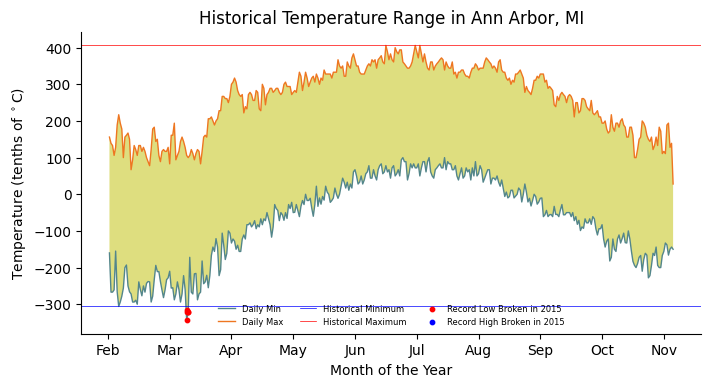

In [ ]:
import datetime as dt

fig, ax = plt.subplots(figsize=(8,4), dpi=100)

plt.plot(mins.index, mins, c='#53868b', lw=1, zorder=1)
plt.plot(maxs.index, maxs, c='#ee7621', lw=1, zorder=1)

plt.scatter(below_rec_15.index, below_rec_15, c='r', marker='o', s=10, zorder=2)
plt.scatter(above_rec_15.index, above_rec_15, c='blue', marker='o', s=10, zorder=2)

plt.axhline(min_0514, lw=0.5, color='blue')
plt.axhline(max_0514, lw=0.5, color='red')

ax.set_title('Historical Temperature Range in Ann Arbor, MI')

ax.legend(['Daily Min', 'Daily Max',
           'Historical Minimum', 'Historical Maximum',
           'Record Low Broken in 2015', 'Record High Broken in 2015'],
           fontsize=6, frameon=False, loc=8, ncol=3)

ax.set_ylabel('Temperature (tenths of $^\circ$C)')
ax.set_xlabel('Month of the Year')

m = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
ax.set_xticklabels(m)

fig.gca().xaxis.set_major_locator(plt.MaxNLocator(12))


plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.fill_between(by_day.index,
                 mins, maxs,
                 facecolor='y',
                 alpha=0.5)

# Fixes from discussion board.
fig.patch.set_facecolor('white')
fig.patch.set_alpha(1)